Files already downloaded and verified
Files already downloaded and verified


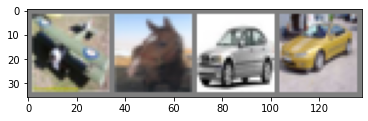

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [11]:
images.shape

torch.Size([4, 3, 32, 32])

`16*5*5=400` is the output after the `conv2`

In [12]:
_batch_images = list(iter(train_loader))[0][0]

Write a CNN from scratch.

Architecture:
- Each convolution layers have `5x5` kernel_size, follows by ReLU
    + The first convolution has `6` kernels
    + The second convolution has `16` kernels
- Each pooling layer have kernel size `2x2` and no padding
- After the the second convolution, flattent the image to `16*5*5=400`
- Each linear layer follows by `ReLU` (not include the last one)
- The prediction is probability of ten labels for each image

In [64]:
import torch.nn as nn
import torch.nn.functional as F

In [65]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=3,
            out_channels=6,
            kernel_size=5
        )
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(
            in_channels=6,
            out_channels=16,
            kernel_size=5
        )
        # after flatten the image
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        # flatten the image
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return F.softmax(x, dim=-1)

`_batch_images` contains a batch of 3 colors image, each have size `32x32`

In [66]:
_batch_images.shape

torch.Size([4, 3, 32, 32])

In [67]:
model = ConvNet()

In [68]:
preds = model(_batch_images)

In [21]:
preds.shape, sum(preds[0])

(torch.Size([4, 10]), tensor(1.0000, grad_fn=<AddBackward0>))

##### Example 2

Write a CNN from scratch.

Architecture:
- Each convolution layers have `5x5` kernel_size, follows by ReLU
    + The first convolution has `6` kernels
    + The second convolution has `16` kernels
- Each pooling layer have kernel size `2x2` and no padding
- After the the second convolution, flattent the image to `16*5*5=400`
- Each linear layer follows by `ReLU` (not include the last one)
- The prediction is probability of ten labels for each image

In [69]:
import torch.nn as nn

In [70]:
class ConvNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # start_dim: from color channels
            # end_dim: to width (include height in which dim=2)
            nn.Flatten(start_dim=1, end_dim=3),
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10),
            nn.Softmax(dim=-1)
        )
    
    def forward(self, x):
        return self.model(x)

In [71]:
_batch_images.shape

torch.Size([4, 3, 32, 32])

In [72]:
model = ConvNet2()

In [73]:
preds = model(_batch_images)

In [74]:
preds.shape, sum(preds[0])

(torch.Size([4, 10]), tensor(1., grad_fn=<AddBackward0>))